# Linear Regression

In [30]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

**Generating data**

<function matplotlib.pyplot.show(close=None, block=None)>

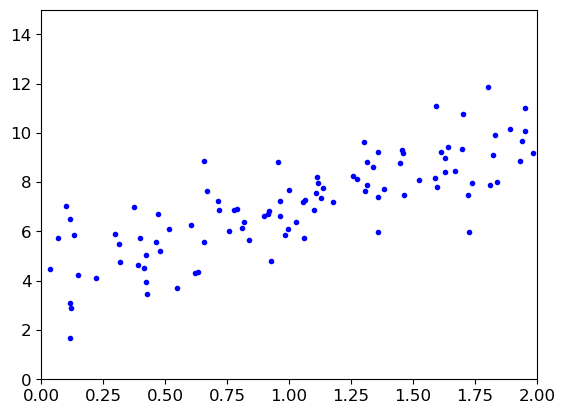

In [35]:
X = 2*np.random.rand(100, 1) # create 100 numbers distribution over [0,2)
y = 4+3*X + np.random.randn(100,1) # + standard normal distribution
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show

Adding '1' column as intercept for original X data.  
If you don't use sklearn package, instead your own function, this is important.

In [25]:
X_b = np.c_[(np.ones((100,1)), X)]
X_b[:5] # check the first 5 rows.

array([[1.        , 0.4312103 ],
       [1.        , 0.66571445],
       [1.        , 1.64275992],
       [1.        , 0.82972443],
       [1.        , 1.16441471]])

If you use sklearn, no need for adding '1' column.

In [36]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.coef_, lin_reg.intercept_)

[[2.82913066]] [4.17864182]


use the outcome from sklearn to draw a line

<function matplotlib.pyplot.show(close=None, block=None)>

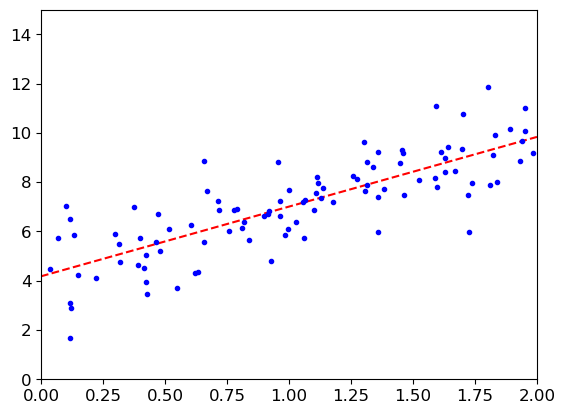

In [57]:
x_new = np.array([[0],[2]])
y_prec = x_new*lin_reg.coef_ + lin_reg.intercept_

plt.plot(x_new, y_prec, 'r--')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show

### A polynomial regression

create samples

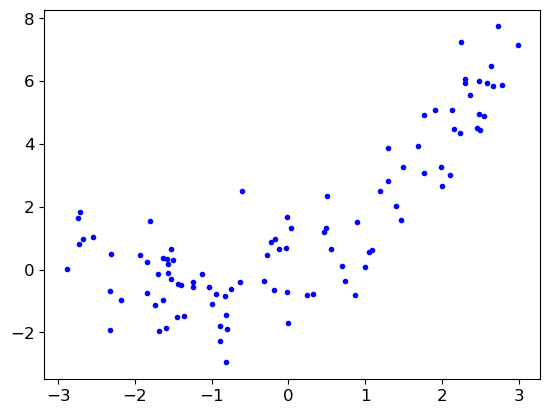

In [59]:
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2 + X + np.random.randn(m,1)
plt.plot(X,y,'b.')
plt.show()

use sklearn to train this regression  
Firstly, processing feature with polynomial.

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# the original feature just has X,
# after polynomial transform, the feature are X X^2
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.36087143])

Secondly, training the regression model

In [65]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
print(lin_reg.coef_, lin_reg.intercept_)
# two coefficients the first one is for X, second is for X^2

[[1.05859909 0.49303905]] [-0.06519269]


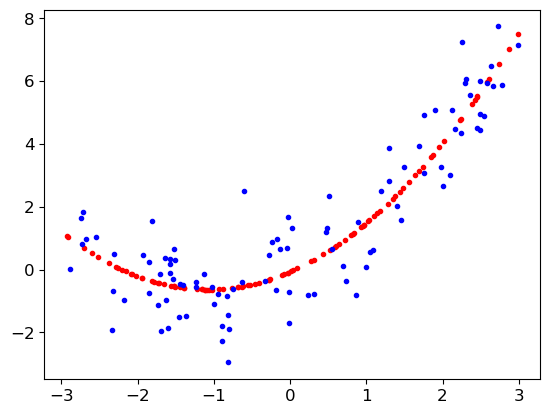

In [79]:
# get the regression line
x_new = np.random.uniform(-3,3,100)
y_prec = lin_reg.coef_[0][0]*x_new + lin_reg.coef_[0][1]*x_new**2 + lin_reg.intercept_
plt.plot(x_new, y_prec, 'r.')
plt.plot(X,y,'b.')
plt.show()

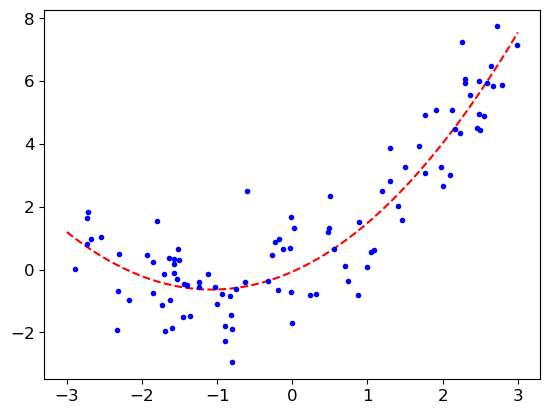

In [87]:
# another way to get the regression line
x_new_2 = np.linspace(-3,3,100).reshape(100,1)
x_new_2_poly = poly_features.transform(x_new_2)
y_prec_2 = lin_reg.predict(x_new_2_poly)
plt.plot(x_new_2, y_prec_2, 'r--')
plt.plot(X,y,'b.')
plt.show()

Comparison experiment for different degrees for polynomial.  
To learn what is over fit

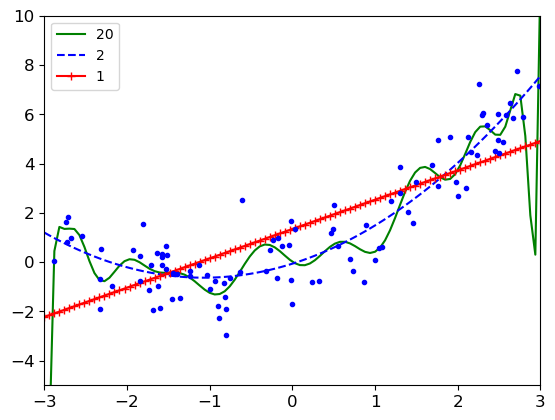

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

for style, degree in (('g-', 20),('b--', 2),('r-+', 1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_reg = Pipeline([
        ('poly_features', poly_features),
        ('StandardScaler', std),
        ('lin_reg', lin_reg)
    ])
    polynomial_reg.fit(X,y)
    y_new_pip = polynomial_reg.predict(x_new_2)
    plt.plot(x_new_2, y_new_pip, style, label=str(degree))
    
plt.plot(X, y, 'b.')
plt.axis([-3,3,-5,10])
plt.legend()
plt.show()

## How to evaluate the performance of the ML model

Check the how does the number of training sample affect the outcomes.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    